# **Decision Tree Implementation**

In [1]:
import pandas as pd
data = pd.read_csv('titanic.csv')

In [2]:
data.head(7)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [3]:
training_data = []

def checkAdult(age):
    if age>=18:
        return "Adult"
    else:
        return "Child"



In [6]:
data["Adult/Child"]=data["Age"].apply(checkAdult)
data.head()

trainingData=data[["Pclass","Adult/Child","Gender","Survived"]]
trainingData.head()



,Pclass,Adult/Child,Gender,Survived
0,3,Adult,male,0
1,1,Adult,female,1
2,3,Adult,female,1
3,1,Adult,female,1
4,3,Adult,male,0


In [7]:
trainingData = trainingData.dropna()
len(trainingData)

891

In [8]:
training_data = trainingData.values.tolist()

In [9]:
def catToNum(series):
    series = series.astype('category')
    return series.cat.codes

catData=trainingData[["Pclass","Adult/Child","Gender","Survived"]].apply(catToNum)
trainingData[["Pclass","Adult/Child","Gender","Survived"]]=catData
trainingData.head()

,Pclass,Adult/Child,Gender,Survived
0,2,0,1,0
1,0,0,0,1
2,2,0,0,1
3,0,0,0,1
4,2,0,1,0


In [10]:

# Final features and label
features = ['Pclass', 'Gender', 'Adult/Child', 'Fare']
label = 'Survived'

# Prepare dataset
dataset = data[features + [label]].values.tolist()
print(dataset[:5])

[[3, 'male', 'Adult', 7.25, 0], [1, 'female', 'Adult', 71.2833, 1], [3, 'female', 'Adult', 7.925, 1], [1, 'female', 'Adult', 53.1, 1], [3, 'male', 'Adult', 8.05, 0]]


In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size = 0.2)

#### Implemenmt the ID3 algorithm on Titanic dataset to predict the survival (yes or no) on the basis of some features

## ID3 Algorithm Implementation

Below you will implement the ID3 algorithm by completing the provided function and class templates. Fill in the missing logic inside the functions and classes.

In [15]:
class Node:
    def __init__(self,is_leaf=False, prediction=None, question=None, true_branch=None, false_branch=None):
        self.is_leaf=is_leaf
        self.question=question
        self.prediction=prediction
        self.true_branch=true_branch
        self.false_branch=false_branch

class Question:
    def __init__(self,column,value):
        self.column=column
        self.value=value

    def match(self,example):
        val=example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value



In [58]:
import math
# the function to find if the value passed is numeric or not

def is_numeric(value):
    # validate if the data is of numeric type int or float
    if(isinstance(value,int) or isinstance(value,float)):
        return True
    else:
        return False
    pass


def unique_values(rows,col):
    # find the unique values in column
    unique=[]
    for row in rows:
        if row[col] not in unique:
            unique.append(row[col])
    return unique

def class_counts(rows):
    # find the class or label counts in the given dataset ( rows )
    counts={}
    for row in rows:
        if row[-1] not in counts:
            counts[row[-1]]=1
        else:
            counts[row[-1]]+=1
    return counts


def entropy(rows):
    counts=class_counts(rows)
    impurity=0.0
    # TODO : find the total entrophy for given data ( rows )
    for label in counts:
        prob_of_label=counts[label]/float(len(rows))
        impurity-=prob_of_label*math.log(prob_of_label,2)

    return impurity

def info_gain(left , right,current_uncertinity):
    # TODO : find the information gain for left and right subtree and the given overall uncertinity or entrophy
    # Calculate the weighted average of entropy for left and right branches
    p = float(len(left)) / (len(left) + len(right))
    IG = current_uncertinity - p * entropy(left) - (1 - p) * entropy(right)
    return IG

def partition(rows,question):
    true_rows=[]
    false_rows=[]
    #TODO: Partition the data into true and false branches based on the question
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)

    return true_rows,false_rows


def find_best_split(rows):
    best_question=None
    best_info_gain=0  # Initialize best_info_gain to 0
    n_feature=len(rows[0])-1
    current_uncertinity=entropy(rows)
    #TODO: Find the best feature and value to split on , you have to iterate over the total columns and unique values in each column and find the column with the value which split best the data wwhere information gain is highest
    for col in range(n_feature):
        values=unique_values(rows,col)
        for val in values:
            question=Question(col,val)
            true_rows,false_rows=partition(rows,question)
            # If the data is not split, skip this question
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain for this split
            gain = info_gain(true_rows, false_rows, current_uncertinity)

            # If this split gives the best information gain so far, update best_gain and best_question
            if gain >= best_info_gain: # Update best_info_gain if gain is higher or equal
                best_info_gain, best_question = gain, question

    return best_info_gain,best_question




def build_tree(rows):
    info_gain,question=find_best_split(rows)
    if info_gain==0:
        return Node(True,prediction=class_counts(rows))
    true_rows,false_rows=partition(rows,question)

    true_branch=build_tree(true_rows)
    false_branch=build_tree(false_rows)
    return Node(False,question=question,true_branch=true_branch,false_branch=false_branch)


def print_tree(node, spacing=""):
    if node.is_leaf:
        print(spacing + "Predict", node.prediction)
        return

    print(spacing + f"Is column[{node.question.column}] == {node.question.value}?")

    print(spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    print(spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")


def classify(row, node):
    # recursively iterates the tree till leaf node and return there prediction
    if node.is_leaf:
        return node.prediction
    else:
        #print_leaf(node.prediction)
        if node.question.match(row):
            return classify(row, node.true_branch)
        else:
            return classify(row, node.false_branch)


def print_leaf(counts):
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts:
        probs[lbl] = f"{int(counts[lbl] / total * 100)}%"
    return probs

In [59]:
# --- Build and Print Tree ---

my_tree = build_tree(train)
print_tree(my_tree)

# --- Predictions on Test Data ---

y_true = []
y_pred = []

for row in test:
    prediction = classify(row, my_tree)
    predicted_label = max(prediction, key=prediction.get)
    y_pred.append(predicted_label)
    y_true.append(row[-1])

Is column[1] == male?
--> True:
  Is column[0] == 2?
  --> True:
    Is column[3] == 7.925?
    --> True:
      Is column[3] == 8.05?
      --> True:
        Is column[2] == Adult?
        --> True:
          Is column[3] == 56.4958?
          --> True:
            Is column[3] == 73.5?
            --> True:
              Predict {0: 3}
            --> False:
              Predict {1: 3, 0: 1}
          --> False:
            Is column[3] == 26.25?
            --> True:
              Predict {0: 10}
            --> False:
              Is column[3] == 20.2125?
              --> True:
                Is column[3] == 26.0?
                --> True:
                  Predict {0: 7, 1: 1}
                --> False:
                  Predict {0: 9}
              --> False:
                Is column[3] == 18.7875?
                --> True:
                  Predict {1: 1}
                --> False:
                  Is column[3] == 15.85?
                  --> True:
                    Predi

## **Evaluate the model**
Find the following performance matrices results:
- Accuracy (overall correct rate)

- Precision (true positives ÷ predicted positives)

- Recall (true positives ÷ actual positives)

- Confusion Matrix

- Classfication Report

Accuracy: 0.8603351955307262
Precision: 0.8587536254452728
Recall: 0.8603351955307262
Confusion Matrix:
 [[108  10]
 [ 15  46]]


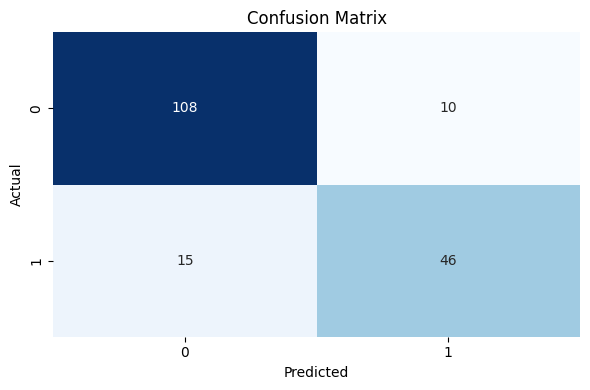

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       118
           1       0.82      0.75      0.79        61

    accuracy                           0.86       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.86      0.86      0.86       179



In [60]:
#Find the following performance matrices results:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

testTree = build_tree(test)

#Accuracy (overall correct rate)
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

#Precision (true positives ÷ predicted positives)
precision = precision_score(y_true, y_pred, average='weighted')
print("Precision:", precision)

#Recall (true positives ÷ actual positives)
recall = recall_score(y_true, y_pred, average='weighted')
print("Recall:", recall)

#Confusion Matrix
confusion = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", confusion)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


#Classfication Report
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

## Visualizing the Tree

In [ ]:
!pip install dtreeviz
!pip install scikit-learn
!pip install graphviz
!pip install dtreeviz --upgrade  # Upgrade dtreeviz to the latest version

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.412574 to fit


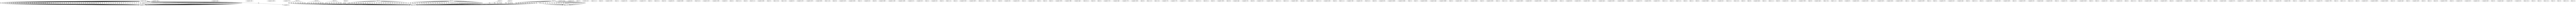

In [56]:
import graphviz
from IPython.display import Image

# Function to parse the tree from the text file
def parse_tree_from_text(filename):
    """Parses the tree structure from a text file."""
    tree_data = []
    with open(filename, 'r') as file:
        for line in file:
            tree_data.append(line.strip())
    return tree_data

# Function to visualize the tree using graphviz
def visualize_tree_from_text(tree_data, filename="decision_tree"):
    """Visualizes the decision tree using graphviz based on text data."""
    dot = graphviz.Digraph(comment='Decision Tree')

    node_count = 0  # Keep track of node IDs
    node_map = {}  # Map node descriptions to node IDs

    for line in tree_data:
        if "Is column" in line:
            # Use a sanitized version for node names
            question = line.replace("[", "_").replace("]", "_").replace("?", "_").replace(" ", "_")

            # Create a unique node ID
            node_id = f"node_{node_count}"
            node_count += 1

            node_map[line] = node_id  # Store mapping
            dot.node(node_id, label=line)
        elif "Predict" in line:
            # Use a sanitized version for node names
            prediction = line.replace("{", "_").replace("}", "_").replace(" ", "_").replace(":", "_")

            # Create a unique node ID
            node_id = f"node_{node_count}"
            node_count += 1

            node_map[line] = node_id  # Store mapping
            dot.node(node_id, label=line)
        elif "--> True:" in line:
            # Get the parent node ID from the node_map
            parent_id = node_map.get(tree_data[tree_data.index(line) - 1], None)
            child_id = node_map.get(tree_data[tree_data.index(line) + 1], None)

            if parent_id and child_id:
                dot.edge(parent_id, child_id, label="True")
        elif "--> False:" in line:
            # Get the parent node ID from the node_map
            parent_id = node_map.get(tree_data[tree_data.index(line) - 1], None)
            child_id = node_map.get(tree_data[tree_data.index(line) + 1], None)

            if parent_id and child_id:
                dot.edge(parent_id, child_id, label="False")

    dot.render(filename, format='png', view=False)
    return Image(filename=f"{filename}.png")

# Load tree data from dtree.txt
tree_data = parse_tree_from_text("dtree.txt")

# Visualize the tree and display the image
image = visualize_tree_from_text(tree_data)
display(image)

In [61]:
import graphviz

def visualize_tree(node, dot=None, parent=None, edge_label=None):
    """Visualizes the decision tree using graphviz."""
    if dot is None:
        dot = graphviz.Digraph(comment='Decision Tree')

    node_id = str(id(node))

    if node.is_leaf:
        label = f"Predict {node.prediction}"
    else:
        label = f"Is column[{node.question.column}] == {node.question.value}?"

    dot.node(node_id, label)

    if parent is not None:
        dot.edge(parent, node_id, label=edge_label)

    if not node.is_leaf:
        visualize_tree(node.true_branch, dot, node_id, "True")
        visualize_tree(node.false_branch, dot, node_id, "False")

    return dot

# --- Build and Print Tree ---

my_tree = build_tree(train)

# --- Visualize the tree ---
dot = visualize_tree(my_tree)
dot.render('decision_tree', view=True)  # Saves and opens the visualization

'decision_tree.pdf'

the end.